# ML ASSIGNMENT - 4

## Qs1
(Based on Step-by-Step Implementation of Ridge Regression using Gradient
Descent Optimization)
Generate a dataset with atleast seven highly correlated columns and a target variable.
Implement Ridge Regression using Gradient Descent Optimization. Take different
values of learning rate (such as 0.0001,0.001,0.01,0.1,1,10) and regularization
parameter (10-15,10-10,10-5,10- 3,0,1,10,20). Choose the best parameters for which ridge
regression cost function is minimum and R2_score is maximum.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from sklearn import datasets
X, y, coef = datasets.make_regression(n_samples=100,#number of samples
                                      n_features=7,#number of features
                                      n_informative=7,#number of useful features 
                                      noise=10,#bias and standard deviation of the guassian noise
                                      coef=True,#true coefficient used to generated the data
                                      random_state=0) #set for same data points for each run

In [ ]:
data = np.column_stack((X,y))

In [ ]:
df = pd.DataFrame(data = data,columns = ['x1','x2','x3','x4','x5','x6','x7','y'])

In [ ]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,y
0,-0.971105,0.821586,0.800565,0.005293,-0.395229,0.314817,0.078260,75.288384
1,0.066517,-0.634322,-0.672460,-0.362741,-0.813146,0.302472,-0.359553,-149.459338
2,-1.726283,-0.401781,0.462782,-1.630198,0.051945,0.177426,-0.907298,-162.524843
3,-0.493320,0.416050,0.781198,-1.156182,-2.069985,-0.542861,1.494485,-10.590221
4,-1.676004,1.079619,-1.466424,-0.813364,-0.575788,1.152332,0.521065,-67.912197


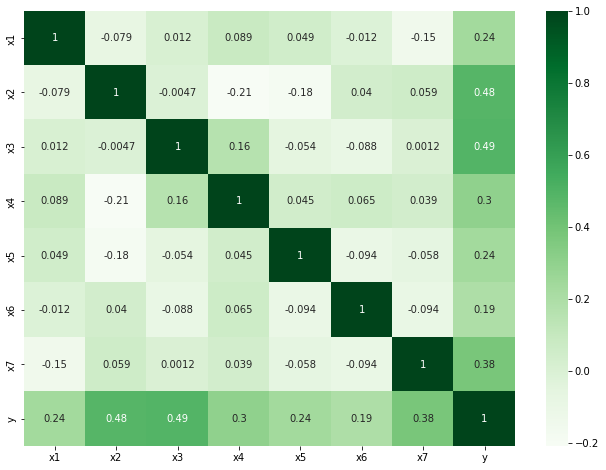

In [ ]:
corr = df.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns = ['y'])
y = df['y']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [ ]:
class RidgeRegression() :
    def __init__( self, learning_rate, iterations, l2_penality ) :
          
        self.learning_rate = learning_rate        
        self.iterations = iterations        
        self.l2_penality = l2_penality
          
    # Function for model training            
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape
          
        # weight initialization        
        self.W = np.zeros( self.n )
          
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        Y_pred = self.predict( self.X )
          
        # calculate gradients      
        dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +               
               ( 2 * self.l2_penality * self.W ) ) / self.m     
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db        
        return self
      
    # Hypothetical function  h( x ) 
    def predict( self, X ) :    
        return X.dot( self.W ) + self.b      
      

In [ ]:
# Model training  
alpha =  [0.0001,0.001,0.01,0.1,1,10]
reg_parameter = [1e-15,1e-10,1e-5,1e-3,0,1,10,20]
reg_pars = [[]]
count = 0

for i in range(len(alpha)):
  for j in range(len(reg_parameter)):
    try:
      model = RidgeRegression(iterations = 1000,learning_rate = alpha[i], l2_penality =  reg_parameter[j])
      model.fit( X_train, y_train )
      y_pred = model.predict(X_test)
      curr_score = r2_score(y_test,y_pred)
      print(curr_score,count,end = '\n\n')
      reg_pars.append([alpha[i],reg_parameter[j],curr_score])
      count+=1
    except:
      continue

0.23709852852468316 0

0.23709852852464908 1

0.23709852512015284 2

0.2370981880718972 3

0.23709852852468316 4

0.23675831560248561 5

0.23371791114283325 6

0.2303846875543044 7

0.9558065694127321 8

0.9558065694124397 9

0.9558065401556083 10

0.9558036436672933 11

0.9558065694127321 12

0.9528480973815959 13

0.9237942629825999 14

0.8881962269214744 15

0.9943253866204742 16

0.9943253866204176 17

0.9943253809519805 18

0.9943248195666949 19

0.9943253866204742 20

0.993558338911965 21

0.973196212625655 22

0.9349828933205067 23

0.9943253700517314 24

0.9943253700516748 25

0.994325364383348 26

0.9943248030089775 27

0.9943253700517314 28

0.9935583312933538 29

0.9731962165833248 30

0.9349828941417292 31



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars


In [ ]:
max_score_index = 0
reg_pars.remove([])
for k in range(len(reg_pars)):
  if(reg_pars[max_score_index][2] and reg_pars[max_score_index][2] < reg_pars[k][2]):
    max_score_index = k

print('Max r2 Score occurs at learning rate = ',reg_pars[max_score_index][0],
      ',regularization parameter = ',reg_pars[max_score_index][1],
      ' and r2 score = ',reg_pars[max_score_index][2])

Max r2 Score occurs at learning rate =  0.01 ,regularization parameter =  1e-15  and r2 score =  0.9943253866204742


## Qs2 
Load the Hitters dataset from the following link
https://drive.google.com/file/d/1qzCKF6JKKMB0p7ul_lLy8tdmRk3vE_bG/view?usp=sharing
(a) Pre-process the data (null values, noise, categorical to numerical encoding)
(b) Separate input and output features and perform scaling
(c) Fit a Linear, Ridge (use regularization parameter as 0.5748), and LASSO (use
regularization parameter as 0.5748) regression function on the dataset.
(d) Evaluate the performance of each trained model on test set. Which model performs
the best and Why?

In [ ]:
h = pd.read_csv('/content/Hitters.csv')
h.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [ ]:
h.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [ ]:
h.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [ ]:
h = h.dropna()
h.shape

(263, 20)

In [ ]:
cat_cols = [col for col in h.columns if col not in h.describe().columns]
print(cat_cols)

['League', 'Division', 'NewLeague']


In [ ]:
h.League.value_counts()

A    139
N    124
Name: League, dtype: int64

In [ ]:
h['League'].replace(['A','N'],[0,1],inplace = True)

In [ ]:
h.Division.value_counts()

W    134
E    129
Name: Division, dtype: int64

In [ ]:
h['Division'].replace(['W','E'],[0,1],inplace = True)

In [ ]:
h.NewLeague.value_counts()

A    141
N    122
Name: NewLeague, dtype: int64

In [ ]:
h['NewLeague'].replace(['A','N'],[0,1],inplace = True)

In [ ]:
h.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,0,632,43,10,475.0,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,0,880,82,14,480.0,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,1,200,11,3,500.0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,1,1,805,40,4,91.5,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,0,282,421,25,750.0,0


In [ ]:
X = h.drop(columns= ['Salary'])
y = h['Salary']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = scaler.fit_transform(X)
# X = pd.DataFrame(X_scaled,columns = X.columns)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [ ]:
# Lasso Regression

class LassoRegression() :
	
	def __init__( self, learning_rate, iterations, l1_penality ) :
		self.learning_rate = learning_rate		
		self.iterations = iterations		
		self.l1_penality = l1_penality
		
	# Function for model training
			
	def fit( self, X, Y ) :	
		# no_of_training_examples, no_of_features		
		self.m, self.n = X.shape		
		# weight initialization		
		self.W = np.zeros( self.n )		
		self.b = 0		
		self.X = X		
		self.Y = Y
		
		# gradient descent learning
				
		for i in range( self.iterations ) :
			
			self.update_weights()
			
		return self
	
	# Helper function to update weights in gradient descent
	
	def update_weights( self ) :
			
		Y_pred = self.predict( self.X )
		
		# calculate gradients
		
		dW = np.zeros( self.n )
		
		for j in range( self.n ) :
			
			if self.W[j] > 0 :
				
				dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred ) )
						
						+ self.l1_penality ) / self.m
		
			else :
				
				dW[j] = ( - ( 2 * ( self.X[:, j] ).dot( self.Y - Y_pred ) )
						
						- self.l1_penality ) / self.m

	
		db = - 2 * np.sum( self.Y - Y_pred ) / self.m
		
		# update weights
	
		self.W = self.W - self.learning_rate * dW
	
		self.b = self.b - self.learning_rate * db
		
		return self
	
	# Hypothetical function h( x )
	
	def predict( self, X ) :
	
		return X.dot( self.W ) + self.b


In [ ]:
from sklearn.linear_model import LinearRegression
LinearModel = LinearRegression()
LinearModel.fit(X_train,y_train)
y_pred = LinearModel.predict(X_test)
Linear_accuracy = r2_score(y_test,y_pred)

In [ ]:
Ridgemodel = RidgeRegression(iterations = 1000, learning_rate = 0.01, l2_penality = 0.5748 )
Ridgemodel.fit( X_train, y_train )


y_pred = Ridgemodel.predict( X_test )
Ridge_accuracy = r2_score(y_test,y_pred)

In [ ]:
Lassomodel = LassoRegression( iterations = 1000, learning_rate = 0.01, l1_penality = 0.5748 )
Lassomodel.fit( X_train, y_train )

y_pred = Lassomodel.predict( X_test )
Lasso_accuracy = r2_score(y_test,y_pred)

In [ ]:
print('Linear regression accuracy is',Linear_accuracy)
print('Ridge regression accuracy is',Ridge_accuracy)
print('Lasso regression accuracy is',Lasso_accuracy)

Linear regression accuracy is 0.29074518557981444
Ridge regression accuracy is 0.18164178413863807
Lasso regression accuracy is 0.18018424975845826


## Qs 3
Cross Validation for Ridge and Lasso Regression
Explore Ridge Cross Validation (RidgeCV) and Lasso Cross Validation (LassoCV)
function of Python. Implement both on Boston House Prediction Dataset (load_boston
dataset from sklearn.datasets).

In [ ]:
from sklearn.datasets import load_boston
from sklearn.linear_model import RidgeCV,LassoCV

In [ ]:
X, y = load_boston(return_X_y=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv = 5).fit(X, y)
clf.score(X, y)

0.7388703133867616

In [ ]:
clf = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=500).fit(X, y)
clf.score(X, y)

0.7406383217739891